# Firm Average Call Doc2Vec tSNE

Compute average Doc2Vec embeddings for each firm and visualize them using tSNE.

In [33]:
# Packages
import pandas as pd
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA

## Load and Average Data

In [34]:
# Load '../../../Data/Doc2Vec_Vectors/train_set_only_doc2vec_vectors.parquet'
train_set_only_doc2vec_vectors = pd.read_parquet('../../../Data/Doc2Vec_Vectors/train_set_only_doc2vec_vectors.parquet')
train_set_only_doc2vec_vectors

,ticker,fixed_quarter_date,train_test_80_20,doc2vec_0,doc2vec_1,doc2vec_2,doc2vec_3,doc2vec_4,doc2vec_5,doc2vec_6,...,doc2vec_590,doc2vec_591,doc2vec_592,doc2vec_593,doc2vec_594,doc2vec_595,doc2vec_596,doc2vec_597,doc2vec_598,doc2vec_599
0,NEE,2011-04-01,train,0.096152,0.012448,0.110792,0.370414,-0.007633,0.081182,-0.112105,...,-0.169105,0.257034,-0.371397,0.938060,0.115869,-0.849956,-0.878151,-0.191613,0.145275,-0.429365
2,NEE,2011-10-01,train,0.196652,0.066855,0.093877,0.338612,0.039583,0.026579,-0.073750,...,-0.200846,-0.007466,-0.419616,0.913265,0.005924,-1.044994,-0.702282,-0.302511,0.059584,-0.218079
3,NEE,2012-01-01,train,0.159998,0.044097,0.098191,0.394054,0.065712,0.098732,-0.093042,...,-0.223133,0.230341,-0.371785,0.712093,-0.239675,-0.897958,-0.782335,-0.200993,0.082307,-0.254543
4,NEE,2012-04-01,train,0.132308,0.077436,0.090016,0.350628,0.054360,0.056895,-0.087542,...,-0.185399,0.073718,-0.414363,0.716999,-0.175380,-0.648275,-0.656121,-0.198390,0.034506,-0.416061
5,NEE,2012-07-01,train,0.135046,0.037539,0.128558,0.336666,0.032631,0.098562,-0.126038,...,-0.082684,-0.057817,-0.401111,0.876193,-0.194184,-0.779764,-0.722556,-0.321357,-0.253594,-0.166601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,KOP,2015-01-01,train,0.171360,0.106424,0.135922,0.361613,0.043903,0.086705,-0.138036,...,-0.153944,0.535048,-0.844701,0.393990,-0.361283,-0.061412,-0.328803,-0.074976,-0.031894,-0.277902
912,KOP,2015-04-01,train,0.141399,0.089557,0.129467,0.318158,0.059236,0.051793,-0.094016,...,-0.493963,0.728956,-0.739571,0.647282,-0.103960,0.033775,-0.548875,-0.076420,-0.167214,-0.453214
914,KOP,2015-10-01,train,0.188014,0.053335,0.030327,0.304871,0.068235,0.136801,-0.103217,...,-0.401082,0.705631,-0.613554,0.318372,-0.308976,0.104408,-0.329960,-0.226888,0.093149,-0.347842
915,KOP,2016-01-01,train,0.205142,0.111981,0.132103,0.342970,0.047705,0.002264,-0.107936,...,-0.453407,0.634877,-0.687092,0.279048,-0.242548,0.084653,-0.522515,-0.350393,0.093046,0.013722


In [35]:
# Drop unneeded columns, group by ticker, average all other columns
lim_cols = train_set_only_doc2vec_vectors.drop(columns=['fixed_quarter_date', 'train_test_80_20'])
firm_doc2vec = lim_cols.groupby('ticker').mean().reset_index()
firm_doc2vec

,ticker,doc2vec_0,doc2vec_1,doc2vec_2,doc2vec_3,doc2vec_4,doc2vec_5,doc2vec_6,doc2vec_7,doc2vec_8,...,doc2vec_590,doc2vec_591,doc2vec_592,doc2vec_593,doc2vec_594,doc2vec_595,doc2vec_596,doc2vec_597,doc2vec_598,doc2vec_599
0,AAPL,0.159057,0.052179,0.109439,0.324668,0.043798,0.054615,-0.120265,0.075453,0.164953,...,-0.304335,0.627722,-0.079751,0.560086,-0.062746,-0.226480,-0.425949,0.066768,-0.165850,-0.086064
1,ABB,0.155648,0.057806,0.108995,0.351643,0.058928,0.068663,-0.110094,0.111351,0.149494,...,-0.326352,0.210306,-0.233041,0.646351,0.035639,-0.193451,-0.259547,-0.131939,-0.092759,-0.029047
2,ABBV,0.130992,0.061934,0.112742,0.349509,0.033739,0.071909,-0.088028,0.109011,0.126572,...,-1.134825,0.563907,-0.120729,0.232756,-0.112475,-0.269418,-0.580562,0.088437,-0.062485,-0.064648
3,ABC,0.149845,0.062290,0.101895,0.333251,0.021332,0.077360,-0.086929,0.073085,0.144227,...,-0.031757,0.021005,-0.334735,0.029826,0.168818,-0.362354,-0.463853,-0.068047,0.080483,-0.225382
4,ABG,0.124696,0.047824,0.094657,0.340173,0.033392,0.031527,-0.093100,0.056727,0.132370,...,-0.339411,0.168082,-0.592320,0.815916,-0.086282,-0.131672,-0.343626,-0.338615,0.153404,-0.048416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,XRX,0.186972,0.053065,0.127570,0.346262,0.038194,0.061342,-0.152160,0.081962,0.171843,...,-0.641557,0.356365,-0.329794,0.457770,0.440458,0.134245,-0.304387,-0.006405,0.003814,-0.073750
526,XYL,0.181473,0.157031,0.096858,0.369068,-0.034598,0.003069,-0.152513,0.094877,0.157918,...,-0.347859,0.242066,-0.689655,0.581142,-0.232239,-0.083146,-0.414809,-0.121200,-0.078148,-0.131032
527,YUM,0.148469,0.073339,0.112407,0.324551,0.037148,0.075365,-0.091852,0.093514,0.134723,...,-0.375696,0.153047,-0.606461,0.894578,-0.197127,-0.324416,-0.397587,-0.335787,-0.467180,-0.258404
528,ZBRA,0.166253,0.061926,0.108085,0.353161,0.064369,0.073836,-0.092048,0.113987,0.129753,...,-0.568223,0.658886,-0.138317,0.649544,-0.115161,-0.283412,-0.301141,-0.238352,-0.145644,-0.147920


## Some similarity checks

In [36]:
# Compare cosine similarity of AMD and NVDA and AMD and ABBV and AMD and YUM
from sklearn.metrics.pairwise import cosine_similarity
print('amd nvidia similarity')
print(cosine_similarity(firm_doc2vec[firm_doc2vec['ticker'] == 'AMD'].drop(columns='ticker'), firm_doc2vec[firm_doc2vec['ticker'] == 'NVDA'].drop(columns='ticker')))
print('amd abbv similarity')
print(cosine_similarity(firm_doc2vec[firm_doc2vec['ticker'] == 'AMD'].drop(columns='ticker'), firm_doc2vec[firm_doc2vec['ticker'] == 'ABBV'].drop(columns='ticker')))
print('amd yum similarity')
print(cosine_similarity(firm_doc2vec[firm_doc2vec['ticker'] == 'AMD'].drop(columns='ticker'), firm_doc2vec[firm_doc2vec['ticker'] == 'YUM'].drop(columns='ticker')))

amd nvidia similarity
[[0.8492548]]
amd abbv similarity
[[0.81325006]]
amd yum similarity
[[0.8162414]]


Seems promising for identifying sectors!

## Add Sector

In [37]:
# Need to reload all data, just ticker and sector columns
# list of files in '../../../Data/All_Data/All_Data_Fixed_Quarter_Dates'
file_list = [f for f in os.listdir(r'../../../Data/All_Data/All_Data_Fixed_Quarter_Dates') if f.endswith('.parquet')]
# read in all parquet files
sector_df = pd.concat([pd.read_parquet(r'../../../Data/All_Data/All_Data_Fixed_Quarter_Dates/' + f, columns=['ticker', 'Sector']) for f in file_list]).drop_duplicates()
sector_df

,ticker,Sector
0,AAPL,Information Technology
10,ABB,Industrials
27,ABBV,Health Care
36,ABC,Health Care
59,ABG,Consumer Discretionary
...,...,...
874,XRX,Information Technology
877,XYL,Industrials
878,YUM,Consumer Discretionary
898,ZBRA,Information Technology


In [38]:
# Note some firms ended up being in the training data only, so this inner join does not make use of all sector information
firm_doc2vec = pd.merge(firm_doc2vec, sector_df, on='ticker')
firm_doc2vec

,ticker,doc2vec_0,doc2vec_1,doc2vec_2,doc2vec_3,doc2vec_4,doc2vec_5,doc2vec_6,doc2vec_7,doc2vec_8,...,doc2vec_591,doc2vec_592,doc2vec_593,doc2vec_594,doc2vec_595,doc2vec_596,doc2vec_597,doc2vec_598,doc2vec_599,Sector
0,AAPL,0.159057,0.052179,0.109439,0.324668,0.043798,0.054615,-0.120265,0.075453,0.164953,...,0.627722,-0.079751,0.560086,-0.062746,-0.226480,-0.425949,0.066768,-0.165850,-0.086064,Information Technology
1,ABB,0.155648,0.057806,0.108995,0.351643,0.058928,0.068663,-0.110094,0.111351,0.149494,...,0.210306,-0.233041,0.646351,0.035639,-0.193451,-0.259547,-0.131939,-0.092759,-0.029047,Industrials
2,ABBV,0.130992,0.061934,0.112742,0.349509,0.033739,0.071909,-0.088028,0.109011,0.126572,...,0.563907,-0.120729,0.232756,-0.112475,-0.269418,-0.580562,0.088437,-0.062485,-0.064648,Health Care
3,ABC,0.149845,0.062290,0.101895,0.333251,0.021332,0.077360,-0.086929,0.073085,0.144227,...,0.021005,-0.334735,0.029826,0.168818,-0.362354,-0.463853,-0.068047,0.080483,-0.225382,Health Care
4,ABG,0.124696,0.047824,0.094657,0.340173,0.033392,0.031527,-0.093100,0.056727,0.132370,...,0.168082,-0.592320,0.815916,-0.086282,-0.131672,-0.343626,-0.338615,0.153404,-0.048416,Consumer Discretionary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,XRX,0.186972,0.053065,0.127570,0.346262,0.038194,0.061342,-0.152160,0.081962,0.171843,...,0.356365,-0.329794,0.457770,0.440458,0.134245,-0.304387,-0.006405,0.003814,-0.073750,Information Technology
526,XYL,0.181473,0.157031,0.096858,0.369068,-0.034598,0.003069,-0.152513,0.094877,0.157918,...,0.242066,-0.689655,0.581142,-0.232239,-0.083146,-0.414809,-0.121200,-0.078148,-0.131032,Industrials
527,YUM,0.148469,0.073339,0.112407,0.324551,0.037148,0.075365,-0.091852,0.093514,0.134723,...,0.153047,-0.606461,0.894578,-0.197127,-0.324416,-0.397587,-0.335787,-0.467180,-0.258404,Consumer Discretionary
528,ZBRA,0.166253,0.061926,0.108085,0.353161,0.064369,0.073836,-0.092048,0.113987,0.129753,...,0.658886,-0.138317,0.649544,-0.115161,-0.283412,-0.301141,-0.238352,-0.145644,-0.147920,Information Technology


## tSNE

C:\Users\ijyli\AppData\Local\Temp\ipykernel_11856\650307017.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


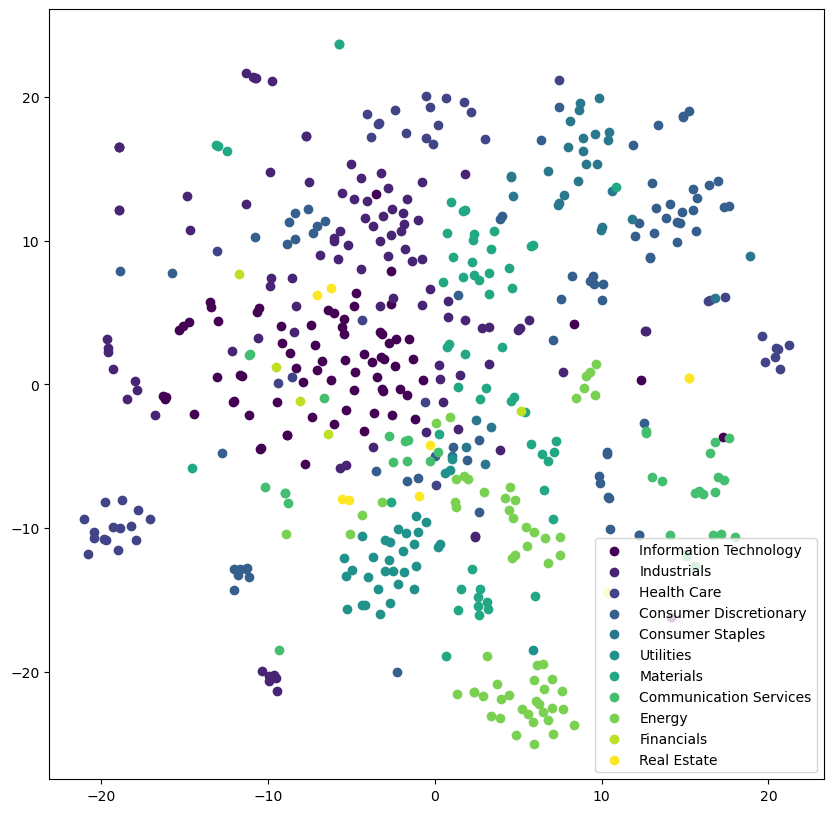

In [39]:
# dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
X    = tsne.fit_transform(firm_doc2vec.drop(columns = ['ticker', 'Sector'])) # 2D representation
y    = firm_doc2vec['Sector'] # labels for visual
unique_labels = firm_doc2vec['Sector'].unique()

# visualize
plt.figure(figsize=(10, 10))
viridis = cm.get_cmap('viridis')
colors  = np.linspace(0,1,len(unique_labels))
for unique_label, color_val in zip(unique_labels, colors):
    plt.scatter( X[y==unique_label,0], 
                 X[y==unique_label,1], 
                 color=viridis(color_val), label=unique_label )
plt.legend()
plt.show()

C:\Users\ijyli\AppData\Local\Temp\ipykernel_11856\898582368.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


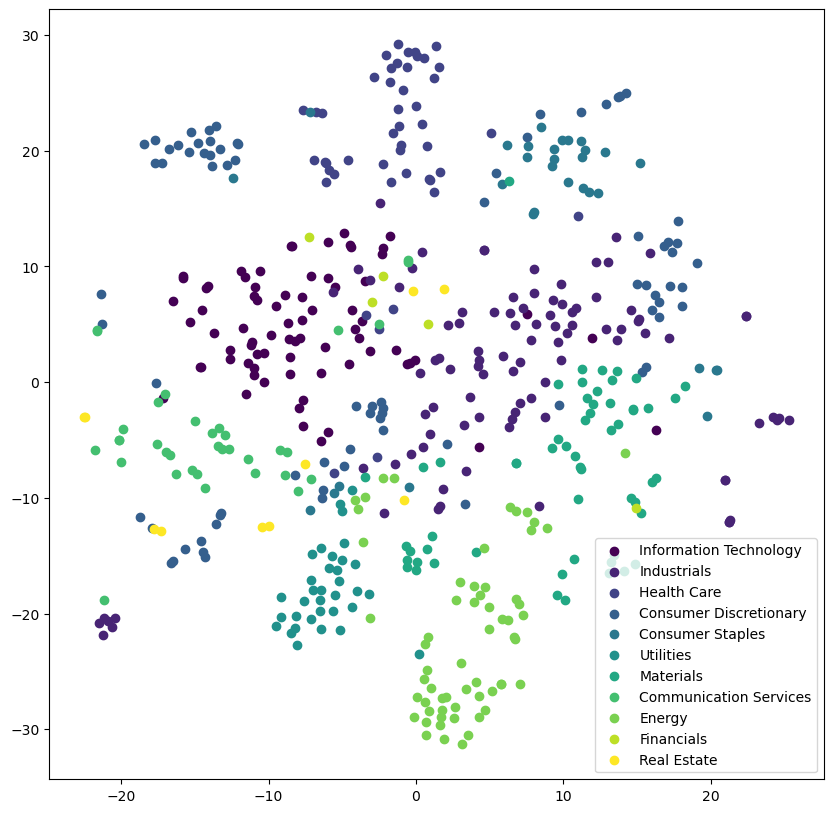

In [40]:
# Run PCA to reduce dimension first
# dimensionality reduction
pca = PCA(n_components=50)
X_pca = pca.fit_transform(firm_doc2vec.drop(columns = ['ticker', 'Sector'])) # 2D representation
tsne = TSNE(n_components=2, random_state=0)
X    = tsne.fit_transform(X_pca) # 2D representation
y    = firm_doc2vec['Sector'] # labels for visual
unique_labels = firm_doc2vec['Sector'].unique()

# visualize
plt.figure(figsize=(10, 10))
viridis = cm.get_cmap('viridis')
colors  = np.linspace(0,1,len(unique_labels))
for unique_label, color_val in zip(unique_labels, colors):
    plt.scatter( X[y==unique_label,0], 
                 X[y==unique_label,1], 
                 color=viridis(color_val), label=unique_label )
plt.legend()
plt.show()

## Just PCA

[0.06513749 0.05251367]
0.11765116


C:\Users\ijyli\AppData\Local\Temp\ipykernel_11856\2453009336.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis')


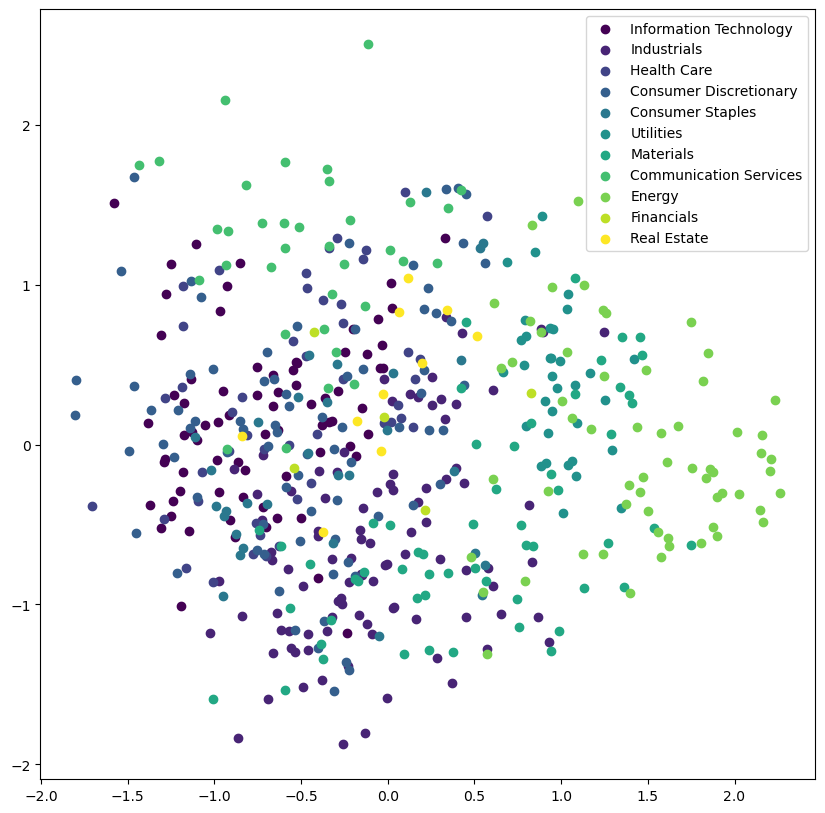

In [41]:
# Reduce to two dimensions and check share of variance explained
pca = PCA(n_components=2)
X_pca = pca.fit_transform(firm_doc2vec.drop(columns = ['ticker', 'Sector'])) # 2D representation
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

# y and unique labels
y    = firm_doc2vec['Sector'] # labels for visual
unique_labels = firm_doc2vec['Sector'].unique()

# visualize
plt.figure(figsize=(10, 10))
viridis = cm.get_cmap('viridis')
colors  = np.linspace(0,1,len(unique_labels))
for unique_label, color_val in zip(unique_labels, colors):
    plt.scatter( X_pca[y==unique_label,0], 
                 X_pca[y==unique_label,1], 
                 color=viridis(color_val), label=unique_label )
plt.legend()
plt.show()